<h1> <center> Methods to Check Stationarity </center> </h1>

<hr></hr>

<h2><center>Objectives</center><h2>
This section looks at some common methods which we can use to perform stationary vs non-stationary check.
<hr></hr>

<h2> <b>Step 1:</b> Importing all the required packages. </h2>

In [7]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose

<hr></hr>
<h2> <b>Step 2:</b> Accessing, Importing, Clearning, and Pre-Processing Data </h2>

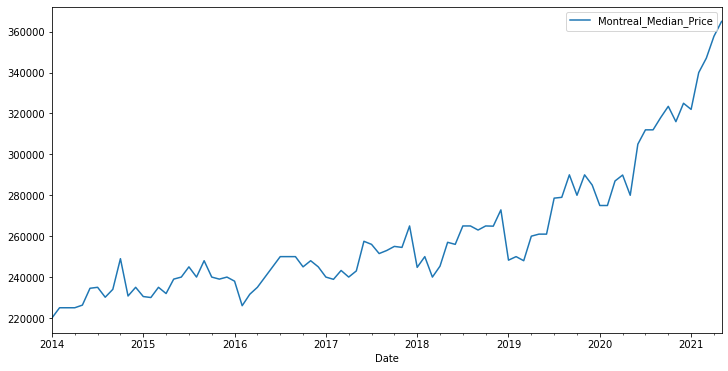

In [13]:
data_orig = pd.read_csv('quebec_real_estate.csv')
data_orig['Date'] = pd.to_datetime(data_orig['Date']) # convert date column to DateTime
ax = data_orig.plot(x='Date', y='Montreal_Median_Price', figsize=(12,6))

<hr></hr>
<h2><center>Visual test </center></h2>

Consider the plots we used in the previous section. We were able to identify the series in which mean and variance were changing with time, simply by looking at each plot. Similarly, we can plot the data and determine if the properties of the series are changing with time or not.

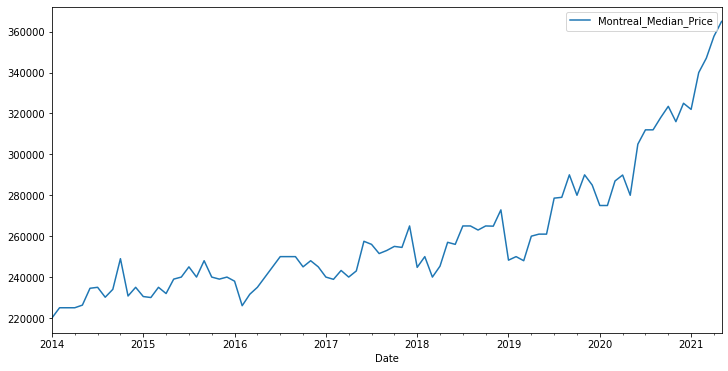

In [14]:
ax = data_orig.plot(x='Date', y='Montreal_Median_Price', figsize=(12,6))

Although its very clear that we have a trend (varying mean) in the above series, this visual approach might not always give accurate results. It is better to confirm the observations using some statistical tests.
<hr></hr>



<hr></hr>
<h2><center>ADF (Augmented Dickey Fuller) Test </center></h2>

he Dickey Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. 
<hr></hr>

In [15]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)



Results of Dickey-Fuller Test:
Test Statistic                  3.414756
p-value                         1.000000
#Lags Used                     12.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64


<b>Results of ADF test:</b> The ADF tests gives the following results – test statistic, p value and the critical value at 1%, 5% , and 10% confidence intervals. The results of our test for this particular series are:

In [16]:
#apply adf test on the series
adf_test(data_orig['Montreal_Median_Price'])

Results of Dickey-Fuller Test:
Test Statistic                  3.414756
p-value                         1.000000
#Lags Used                     12.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64


<b>Test for stationarity:</b> If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

In our above example, the test statistic > critical value, which implies that the series is not stationary. This confirms our original observation which we initially saw in the visual test.
<hr></hr>

<hr></hr>
<h2><center>References</h2></center>

1. [A Gentle Introduction to Handling a Non-Stationary Time Series in Python](https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/)
